## Requirement 1:
You’re required to perform data sphering/whitening using the steps discussed in course.\
Please apply the following:
1. Generate a 2-D normally distributed random dataset with mean [2, 2] and covariance matrix [ [10,5], [5,10] ], containing 100 samples.

In [1]:
import numpy as np

mean = [2, 2]; cov = [[10, 5], [5, 10]] ; n = 100
np.random.seed(42)  # Set a seed for reproducibility
data = np.random.multivariate_normal(mean, cov, n)

2. Create a function that applies data sphering using the steps discussed in the course (you can’t use a library function to directly perform the sphering).


In [2]:
def apply_sphering(data):
    # Step 1: Zero-center the data
    centered_data = data - data.mean(axis=0)
    
    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False) # rowvar is false as each column represent a variable while rows are observations
    
    # Step 3: Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 4: Compute the whitening transformation matrix
    whitening_matrix = np.dot(np.diag(1.0 / np.sqrt(eigenvalues)), eigenvectors.T)
    
    # Step 5: Apply the whitening transformation
    whitened_data = np.dot(centered_data, whitening_matrix.T)
    
    return whitened_data

3. Plot the data before and after the sphering transformation and comment on the results.


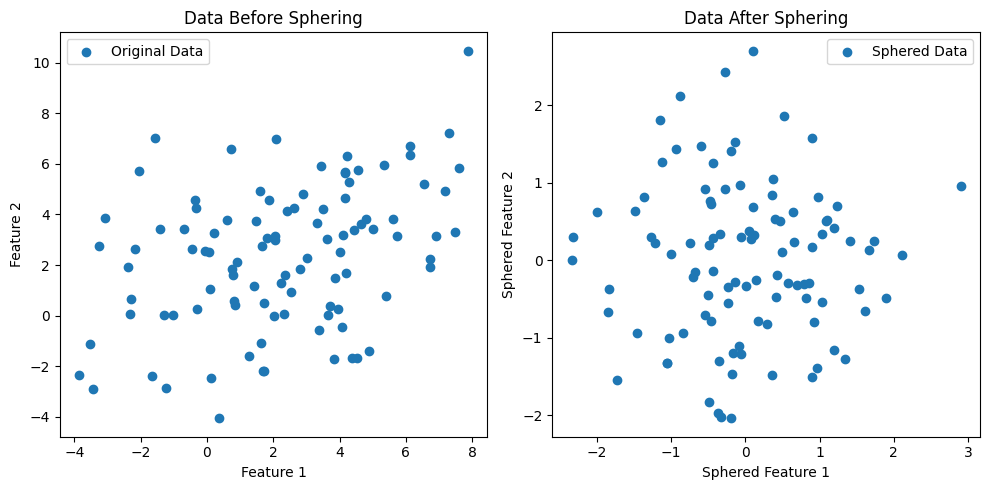

In [3]:
import matplotlib.pyplot as plt

# Plotting the data before and after sphering transformation
plt.figure(figsize=(10, 5))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.title('Data Before Sphering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Applying sphering transformation
whitened_data = apply_sphering(data)

# Plotting the transformed data
plt.subplot(1, 2, 2)
plt.scatter(whitened_data[:, 0], whitened_data[:, 1], label='Sphered Data')
plt.title('Data After Sphering')
plt.xlabel('Sphered Feature 1')
plt.ylabel('Sphered Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

### Comment:
After sphering, the data appears to be centered at (0,0) and ranging from 2 to -2. 

4. Verify that the transformed data has a 2-D mean of 0 and an identity covariance matrix.

In [4]:
# Checking the mean and covariance matrix of transformed data

transformed_mean = np.mean(whitened_data, axis=0)
transformed_cov = np.cov(whitened_data.T)

print(np.isclose(transformed_mean,np.zeros_like(transformed_mean))) # checking the mean against a zeros array
print(np.isclose(transformed_cov,np.identity(2))) # checking the covariance against an identity covariance


[ True  True]
[[ True  True]
 [ True  True]]


## Requirement 2:
You’re required to perform the PCA technique on the Iris dataset.\
Please apply the following:
1. Create a function that performs PCA using the steps discussed in the course (you can’t use a library function to directly perform PCA).
2. Use your function to apply PCA on the Iris dataset.\
The function should return the sorted eigenvectors, their corresponding eigenvalues and the transformed dataset.

In [5]:
def PCA(data):
    # Step 1: Center the data by subtracting the mean along each column
    data_centered = data - data.mean(axis=0)
    
    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(data_centered, rowvar=False)
    
    # Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort the eigenvalues in descending order and get the corresponding indices
    indices = np.argsort(eigenvalues)[::-1]
    
    # Step 5: Sort the eigenvalues and eigenvectors based on the indices
    sorted_eigenvalues = eigenvalues[indices]
    sorted_eigenvectors = eigenvectors[:, indices]
    
    # Step 6: Transform the centered data using the sorted eigenvectors
    transformed_data = np.dot(data_centered, sorted_eigenvectors)
    
    # Return the sorted eigenvalues, sorted eigenvectors, and transformed data
    return sorted_eigenvalues, sorted_eigenvectors, transformed_data

In [6]:
# Importing the iris dataset and spliting it to features and targets/labels/outputs
from sklearn import datasets

features = datasets.load_iris().data
target = datasets.load_iris().target

In [7]:
e_values, e_vectors, transformed_data = PCA(features)

In [8]:
print("EigenValues:",e_values,"\nEigenVectors:",e_vectors,"\nTransformed data:",transformed_data)

EigenValues: [4.22824171 0.24267075 0.0782095  0.02383509] 
EigenVectors: [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]] 
Transformed data: [[-2.68412563e+00 -3.19397247e-01 -2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00  1.77001225e-01 -2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00  1.44949426e-01  1.79002563e-02  1.99683897e-02]
 [-2.74534286e+00  3.18298979e-01  3.15593736e-02 -7.55758166e-02]
 [-2.72871654e+00 -3.26754513e-01  9.00792406e-02 -6.12585926e-02]
 [-2.28085963e+00 -7.41330449e-01  1.68677658e-01 -2.42008576e-02]
 [-2.82053775e+00  8.94613845e-02  2.57892158e-01 -4.81431065e-02]
 [-2.62614497e+00 -1.63384960e-01 -2.18793179e-02 -4.52978706e-02]
 [-2.88638273e+00  5.78311754e-01  2.07595703e-02 -2.67447358e-02]
 [-2.67275580e+00  1.13774246e-01 -1.97632725e-01 -5.62954013e-02]
 [-2.50694709e+00 -6.45068899e-0

3. Verify that the eigenvectors are orthonormal.

In [9]:
def verify_orthonormality(eigenvectors):
    # Orthonormality means that the vectors are normal (unit vectors) and orthogonal to one another.
    num_vectors = eigenvectors.shape[1]
    
    # Checking norm and dot product of eigenvectors
    for i in range(num_vectors):
        norm = np.linalg.norm(eigenvectors[:, i])
        if not np.isclose(norm, 1): # Checking if the vectors are unit vectors
            return False
        for j in range(i+1, num_vectors):
            dot_product = np.dot(eigenvectors[:, i], eigenvectors[:, j])
            if not np.isclose(dot_product, 0):
                return False
        
    return True

In [10]:
verify_orthonormality(e_vectors)

True

4. In one figure, plot all the principal components against each other (PC1 vs PC2, PC1 vs PC3, … . You will have 4 principal components, so a 4x4-plot figure).\
Each class should be represented with a unique color on the plots.


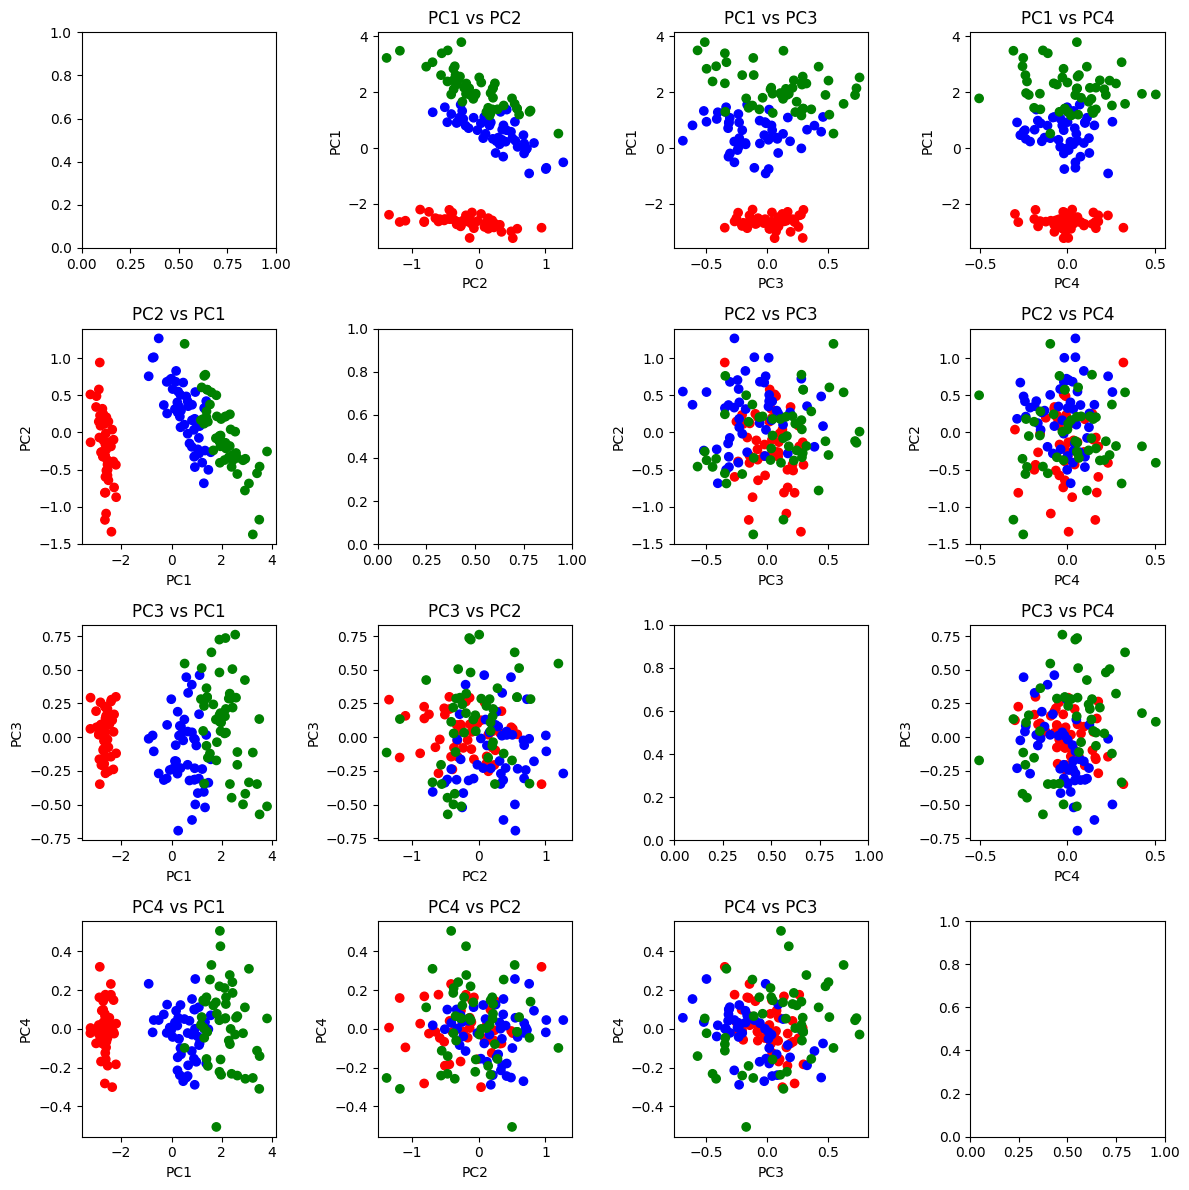

In [11]:
colors = {0: 'red', 1: 'blue', 2: 'green'}

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        if i == j:
            continue
        else:
            # Scatter plots for off-diagonal elements
            ax.scatter(transformed_data[:, j], transformed_data[:, i], c=[colors.get(label) for label in target], marker='o')
            ax.set_title(f"PC{i+1} vs PC{j+1}")
            ax.set_xlabel(f"PC{j+1}")
            ax.set_ylabel(f"PC{i+1}")

plt.tight_layout()
plt.show()

* Comment on the plots.\
The first principal component (PC1) is able to separate the classes effectively from any of the other principal components (PC2, PC3, PC4). However, when considering any combination of the other principal components (PC2, PC3, PC4), they are unable to effectively separate the classes.
* Which 2 PCs look like they separate the classes best? Does it make sense?\
The first and second PCs can best differentiate the classes because they have the most variance (as shown below).

5. Implement each of the following 3 methods to determine the number of PCs to be selected:
* Cumulative Percentage of Variance Explained
* Scree plot
* Size of variance.\
What number of PCs would you select based on each method?

Cumulative Percentage of Variance Explained: [ 92.46187232  97.76852063  99.47878161 100.        ]
Scree Plot:


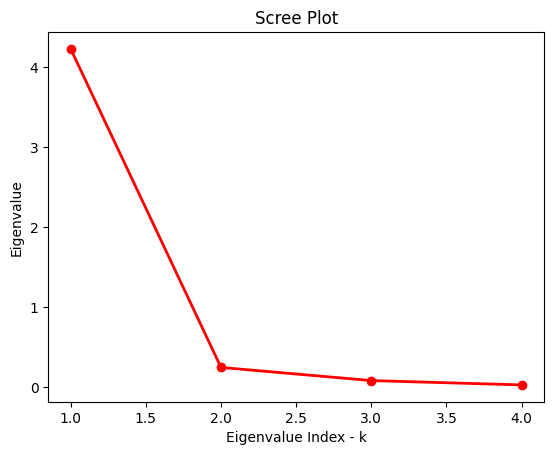

Size of Variance: 1


In [12]:
# Cumulative Percentage of Variance Explained
cumulative_variances = np.cumsum(e_values) / np.sum(e_values) * 100
print("Cumulative Percentage of Variance Explained:", cumulative_variances)

# Scree Plot
plt.plot(np.arange(1, len(e_values) + 1), e_values, "o-", linewidth=2, color="red")
plt.title("Scree Plot")
plt.xlabel("Eigenvalue Index - k")
plt.ylabel("Eigenvalue")
print("Scree Plot:")
plt.show()

# Number of selected PCs according to size of variance
print("Size of Variance:",len(np.where(e_values > e_values.mean())))

According to:
* Cumulative Percentage of Variance Explained: 2 (as there is no cutoff value and the typical values ranges between 70% and 95%)
* Scree plot: 2 (as the elbow seems to occur at k = 2)
* Size of variance: 1

## Requirement 3:
Use Python to solve Exercise 2.1 from the course textbook “Exploratory data analysis using Matlab”.\
EX2.1: Generate n = 50, p = 3 normally distributed random variables that have high variance in one dimension. For example, you might use the following MATLAB code to do this:
x1 = randn(50,1)*100;\
x2 = randn(50,2);\
X = [x1,x2];\
Try PCA using both correlation and covariance matrices. Is the one with the covariance matrix very informative? Which one would be better to use in this case?

In [13]:
from sklearn.decomposition import PCA

# Set seed for reproducibility
np.random.seed(42)

# Generate normally distributed random variables with high variance in one dimension
n = 50
x1 = np.random.randn(n, 1) * 100
x2 = np.random.randn(n, 2)
X_all = np.hstack((x1, x2))

# Perform PCA using correlation matrix
pca_corr = PCA()
X_corr = np.corrcoef(X_all,rowvar=False) 
pca_corr.fit(X_corr)

# Perform PCA using covariance matrix
pca_cov = PCA()
pca_cov.fit(np.cov(X_all,rowvar=False))

# Compare the results
print("Explained variance ratio using correlation matrix:")
print(pca_corr.explained_variance_ratio_)
print("Explained variance ratio using covariance matrix:")
print(pca_cov.explained_variance_ratio_)

Explained variance ratio using correlation matrix:
[6.98575954e-01 3.01424046e-01 2.72279237e-33]
Explained variance ratio using covariance matrix:
[9.99999988e-01 1.16792425e-08 5.26906183e-38]


I came to the conclusion that the correlation matrix is more informative than the covariance matrix; therefore, the correlation matrix should be employed in this circumstance.